In [1]:
import sys
sys.path.insert(1, '/home/preuer/OneDrive/Studium/Master/Semester/Sem_4/Master Thesis/Experiments/tools') # so i can import tools
from  gen_synth_data import *
from plot_helper import *
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

### Plotting Fairness Aware Classifier with 11 different values of a

In [ ]:
disc_factor = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
for df in disc_factor:
    X, Y, Y_sen = generate_synthetic_data(False, 1000, disc_factor=df)

    p_reg, f_reg = LogisticRegression(), LogisticRegression()
    p_reg.fit(X, Y)
    f_reg.fit(X, Y_sen)

    num_to_draw = 200 # we will only draw a small number of points to avoid clutter
    x_draw = X[:num_to_draw]
    y_draw = Y[:num_to_draw]
    Y_sen_draw = Y_sen[:num_to_draw]

    X_s_0 = x_draw[Y_sen_draw == 0.0]
    X_s_1 = x_draw[Y_sen_draw == 1.0]
    y_s_0 = y_draw[Y_sen_draw == 0.0]
    y_s_1 = y_draw[Y_sen_draw == 1.0]


    # Create a mesh grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict probabilities for each point on the grid
    Y_pred_p = p_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Y_pred_p = Y_pred_p.reshape(xx.shape)

    Y_pred_f = f_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Y_pred_f = Y_pred_f.reshape(xx.shape)
    _

    fig, axs = plt.subplots(3, 4, figsize=(18, 13))
    axs = axs.flatten()

    for i, a in enumerate(np.linspace(0, 1, 11)):
        Y_pred_all = a*Y_pred_p + (1-a)*Y_pred_f
        subplot_reg(axs[i], Y_pred_p,Y_pred_f, Y_pred_all, xx, yy, X_s_0, y_s_0, X_s_1, y_s_1, df, a,  legend_flag=False)
    plt.savefig(f"img/fairness_aware_regression_synthetic_data_11a/fairness_aware_regression_df_{df:.2f}_norm_scale.png")

### Random Label Noise - 6 Views 

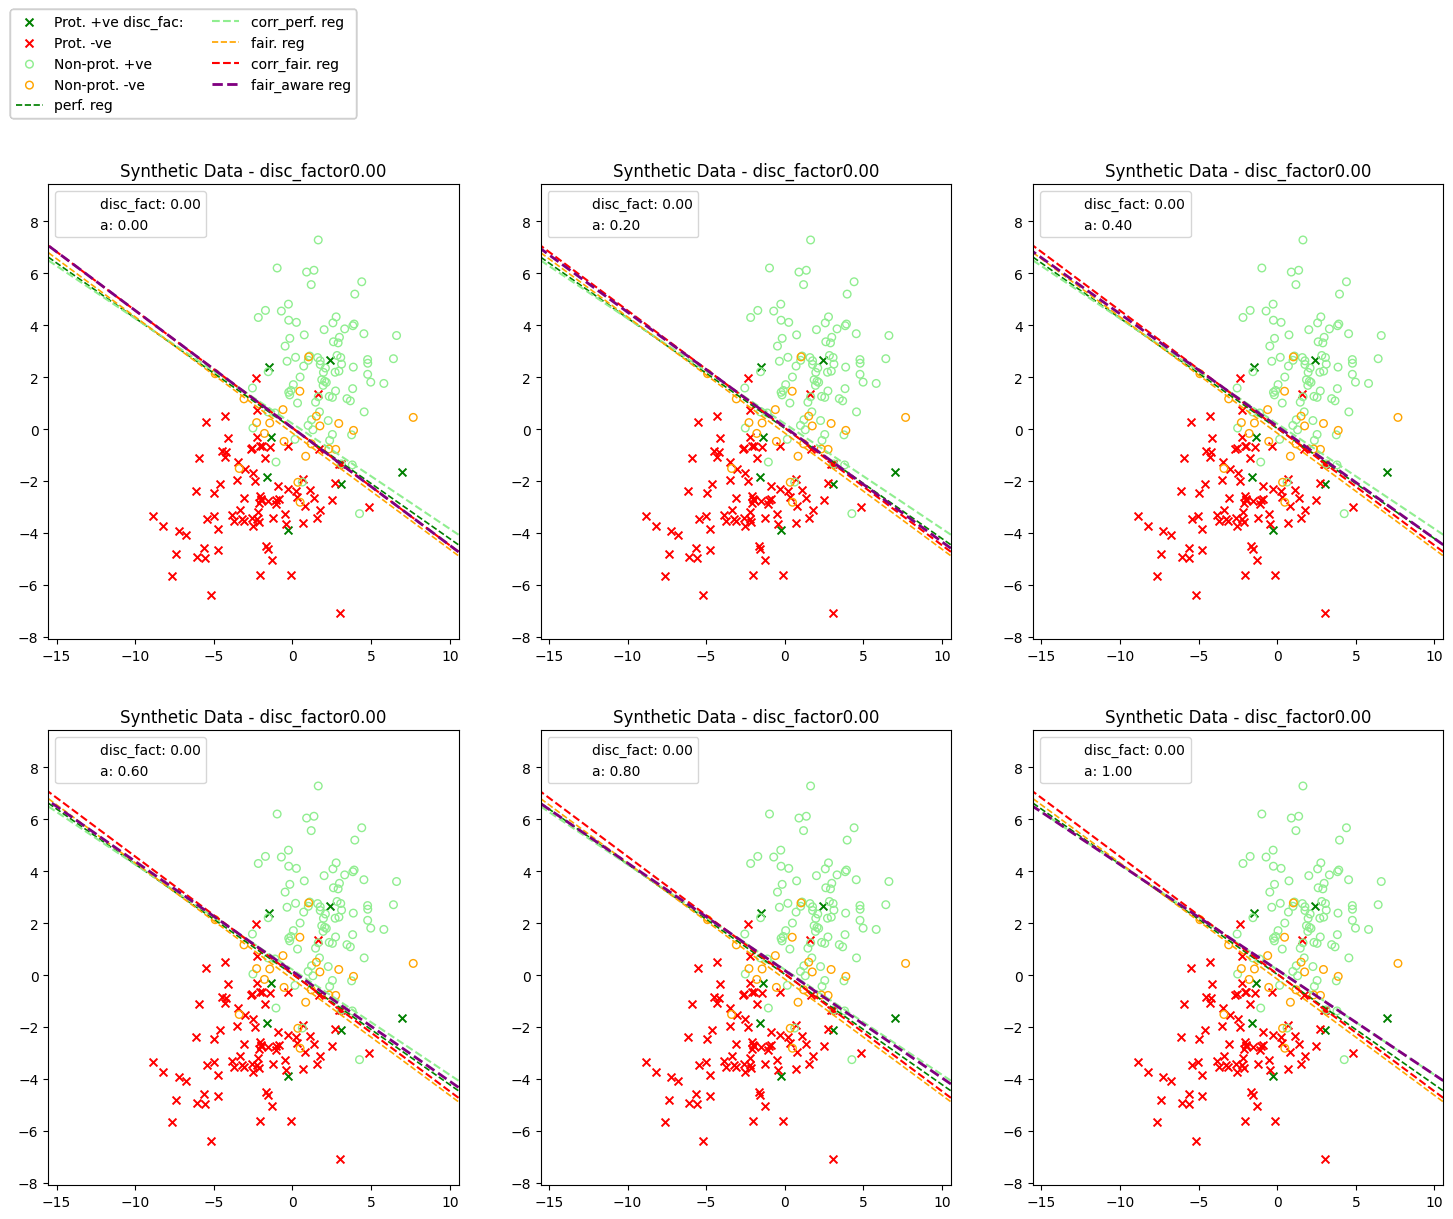

In [10]:
np.random.seed(0)  # Set seed for reproducibility
flip_prob = 0.8  # Probability of flipping each value
disc_factor = [0]

for df in disc_factor:
    X, Y, Y_sen = generate_synthetic_data(False, 1000, disc_factor=df)
    
    #Here we corrupt the labels
    mask = np.random.rand(Y.shape[0]) < flip_prob
    Y_corrupted =  np.where(mask, -Y, Y)            # Y is -1 or 1
    Y_sen_corrupted = np.where(mask, 1 - Y_sen, Y_sen) #Y_sen is 0 or 1!!!

    p_reg, p_reg_cor, f_reg, f_reg_cor = LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()
    p_reg.fit(X, Y)
    p_reg_cor.fit(X, Y_corrupted)
    f_reg.fit(X, Y_sen)
    f_reg_cor.fit(X, Y_sen_corrupted)

    #We only draw a small number of points to avoid clutter in plot
    num_to_draw = 200
    x_draw = X[:num_to_draw]
    y_draw = Y[:num_to_draw]
    Y_sen_draw = Y_sen[:num_to_draw]

    X_s_0 = x_draw[Y_sen_draw == 0.0]
    X_s_1 = x_draw[Y_sen_draw == 1.0]
    y_s_0 = y_draw[Y_sen_draw == 0.0]
    y_s_1 = y_draw[Y_sen_draw == 1.0]

    # Create a mesh grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict class probabilities Y=1|X for each point on the grid
    Y_pred_p = p_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    Y_pred_p_cor = p_reg_cor.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    Y_pred_f = f_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    Y_pred_f_cor = f_reg_cor.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

    #Plotting
    fig, axs = plt.subplots(2, 3, figsize=(18, 13))
    axs = axs.flatten()

    for i, a in enumerate(np.linspace(0, 1, 6)):
        Y_pred_all = a*Y_pred_p_cor + (1-a)*Y_pred_f_cor
        subplot_reg_corr(fig, axs[i], Y_pred_p, Y_pred_p_cor, Y_pred_f,Y_pred_f_cor, Y_pred_all, xx, yy, X_s_0, y_s_0, X_s_1, y_s_1, disc_factor=df, a=a, legend_outside=True)
    plt.savefig(f"img/fairness_aware_regression_synthetic_data_rnd_label_noise_6/fairness_aware_regression_df_{df:.2f}_label_noise_{flip_prob}.png")

In [24]:
p_reg.predict_proba([[3,2]])

array([[0.04719502, 0.95280498]])

### Sensitive Attribute Noise - 6 Views 

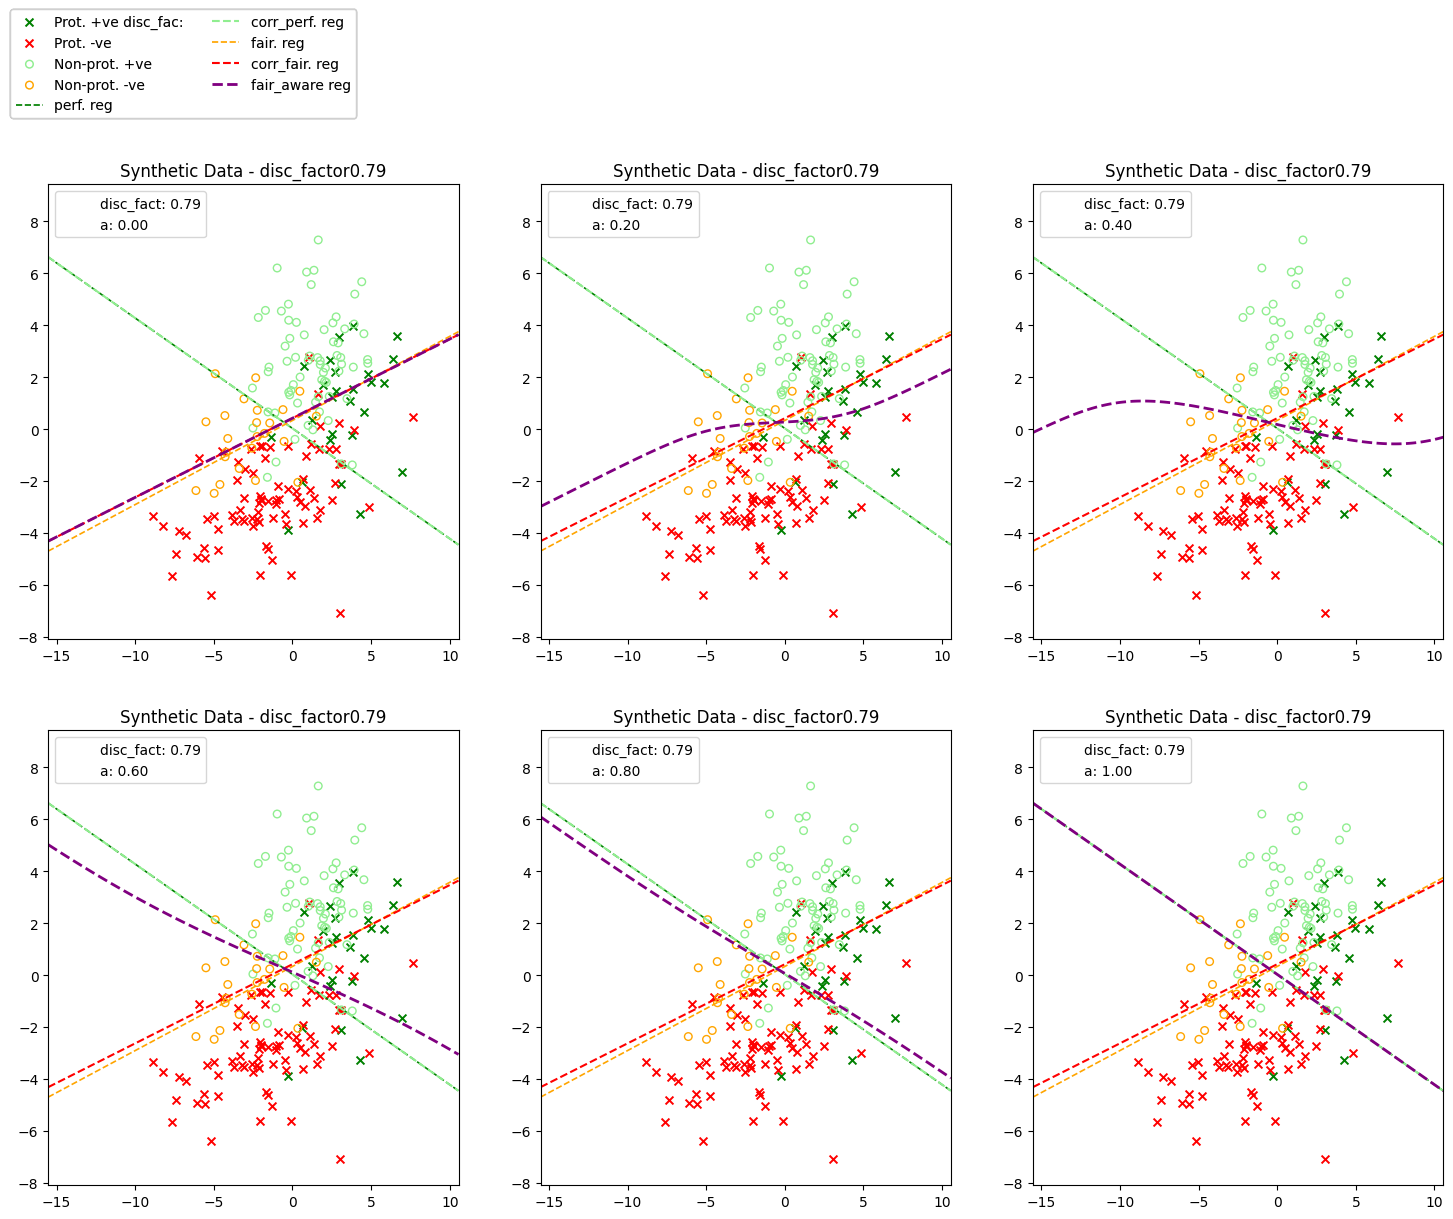

In [15]:
np.random.seed(0)  # Set seed for reproducibility
flip_prob = 0.2  # Probability of flipping each value
disc_factor = [np.pi/4]

for df in disc_factor:
    X, Y, Y_sen = generate_synthetic_data(False, 1000, disc_factor=df)
    
    #Here we corrupt the labels
    mask = np.random.rand(Y.shape[0]) < flip_prob
    Y_corrupted =  Y           # Y is -1 or 1
    Y_sen_corrupted = np.where(mask, 1 - Y_sen, Y_sen) #Y_sen is 0 or 1!!!

    p_reg, p_reg_cor, f_reg, f_reg_cor = LogisticRegression(), LogisticRegression(), LogisticRegression(), LogisticRegression()
    p_reg.fit(X, Y)
    p_reg_cor.fit(X, Y_corrupted)
    f_reg.fit(X, Y_sen)
    f_reg_cor.fit(X, Y_sen_corrupted)

    #We only draw a small number of points to avoid clutter in plot
    num_to_draw = 200
    x_draw = X[:num_to_draw]
    y_draw = Y[:num_to_draw]
    Y_sen_draw = Y_sen[:num_to_draw]

    X_s_0 = x_draw[Y_sen_draw == 0.0]
    X_s_1 = x_draw[Y_sen_draw == 1.0]
    y_s_0 = y_draw[Y_sen_draw == 0.0]
    y_s_1 = y_draw[Y_sen_draw == 1.0]

    # Create a mesh grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Predict probabilities for each point on the grid
    Y_pred_p = p_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    Y_pred_p_cor = p_reg_cor.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    Y_pred_f = f_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    Y_pred_f_cor = f_reg_cor.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)

    #Plotting
    fig, axs = plt.subplots(2, 3, figsize=(18, 13))
    axs = axs.flatten()

    for i, a in enumerate(np.linspace(0, 1, 6)):
        Y_pred_all = a*Y_pred_p_cor + (1-a)*Y_pred_f_cor
        subplot_reg_corr(fig, axs[i], Y_pred_p, Y_pred_p_cor, Y_pred_f,Y_pred_f_cor, Y_pred_all, xx, yy, X_s_0, y_s_0, X_s_1, y_s_1, disc_factor=df, a=a, legend_outside=True)
    plt.savefig(f"img/fairness_aware_regression_synthetic_data_sen_label_noise_6/fairness_aware_regression_df_{df:.2f}_label_noise_{flip_prob}.png")